In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

"""Shows data before it is changed"""
data = pd.read_csv("C:\\Users\\alext\\Downloads\\Sleep_health_and_lifestyle_dataset_no_duplicates.csv")
print(data.to_string())

     Gender  Age            Occupation  Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level   BMI Category Blood Pressure  Heart Rate  Daily Steps Sleep Disorder
0      Male   27     Software Engineer             6.1                 6                       42             6     Overweight         126/83          77         4200            NaN
1      Male   28                Doctor             6.2                 6                       60             8         Normal         125/80          75        10000            NaN
2      Male   28  Sales Representative             5.9                 4                       30             8          Obese         140/90          85         3000    Sleep Apnea
3      Male   28     Software Engineer             5.9                 4                       30             8          Obese         140/90          85         3000       Insomnia
4      Male   29               Teacher             6.3                 6                  

In [12]:
"""BMI category ordinal encoding"""
weight_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Normal Weight': 1,
    'Overweight': 2,
    'Obese': 3
}
# Apply the mapping
data['Weight_Category_BMI'] = data['BMI Category'].map(weight_mapping)




"""Gruppering af steps"""
step_labels = [0, 1, 2]  # 0 for 'bad', 1 for 'middle', 2 for 'good'

# Create a new column 'Step Category Ordinal' with numeric values based on defined ranges
data['Step Category Ordinal'] = pd.cut(data['Daily Steps'], 
                                       bins=[-1, 4999, 7999, float('inf')], 
                                       labels=step_labels)


"""This line of code changes blood pressure. It changes blood pressure into systolic and diastolic then goes though thredsholds to categorize them"""
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)

# Define a function to categorize blood pressure
def categorize_blood_pressure(row):
    systolic = row['Systolic']
    diastolic = row['Diastolic']
    
    if systolic <= 140 and diastolic <= 90:
        return 0 #Normal
    elif 135 <= systolic <= 160 and 90 < diastolic <= 100:
        return 1 #Mild hypertension
    elif 155 <= systolic <= 175 and 100 <= diastolic <= 110:
        return 2 #Moderat hypertension
    elif systolic > 175 or diastolic > 110:
        return 3 #Serious
    else:
        return 'Uncategorized'  # For any values that do not fit above categories

# Apply the function to categorize blood pressure
data['Blood_Pressure_Category'] = data.apply(categorize_blood_pressure, axis=1)



"""Replaces Gender: Female = 0 male = 1"""
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})


"""Physical_Activity ordinal group: Changes numbers into groups from 0-49 = bad/0, 50-69 = middle/1, 70+ = good/2"""
# Define bins and labels for physical activity levels
activity_bins = [0, 50, 70, float('inf')]
activity_labels = [0, 1, 2]  # Ordinal encoding

# Create an ordinal column based on defined bins
data['Physical_Activity_Ordinal'] = pd.cut(data['Physical Activity Level'], bins=activity_bins, labels=activity_labels)

# Apply one-hot encoding
physical_activity_one_hot = pd.get_dummies(data['Physical_Activity_Ordinal'], prefix='Physical_Activity')


"""Binary stress 0 = not stressed 1 = stressed"""
# Define a binary encoding for 'Stress Level': 0 for not stressed (1-5), 1 for stressed (6-10)
data['Stress_Binary'] = data['Stress Level'].apply(lambda x: 1 if 6 <= x <= 10 else 0)





"""Remove columns which are not important"""
# Remove the 'User_ID and age' column
data = data.drop(columns=["Occupation", "Sleep Disorder", "Blood Pressure", "BMI Category", "Physical Activity Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic", "Stress Level"])





from IPython.display import display
display(data)

C:\Users\alext\AppData\Local\Temp\ipykernel_8588\1204146286.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})


,Gender,Age,Sleep Duration,Quality of Sleep,Weight_Category_BMI,Step Category Ordinal,Blood_Pressure_Category,Physical_Activity_Ordinal,Stress_Binary
0,1,27,6.1,6,2,0,0,0,1
1,1,28,6.2,6,1,2,0,1,1
2,1,28,5.9,4,3,0,0,0,1
3,1,28,5.9,4,3,0,0,0,1
4,1,29,6.3,6,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...
127,0,59,8.0,9,2,1,1,2,0
128,0,59,8.1,9,2,1,1,2,0
129,0,59,8.2,9,2,1,1,2,0
130,0,59,8.0,9,2,1,1,2,0


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Prepare features (X) and target (y)
X = data.drop(columns=['Stress_Binary'])  # Replace 'target_column' with the actual target column name
y = data['Stress_Binary']  # Replace 'target_column' with the actual target column name

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40


Confusion Matrix:
[[20  1]
 [ 0 19]]


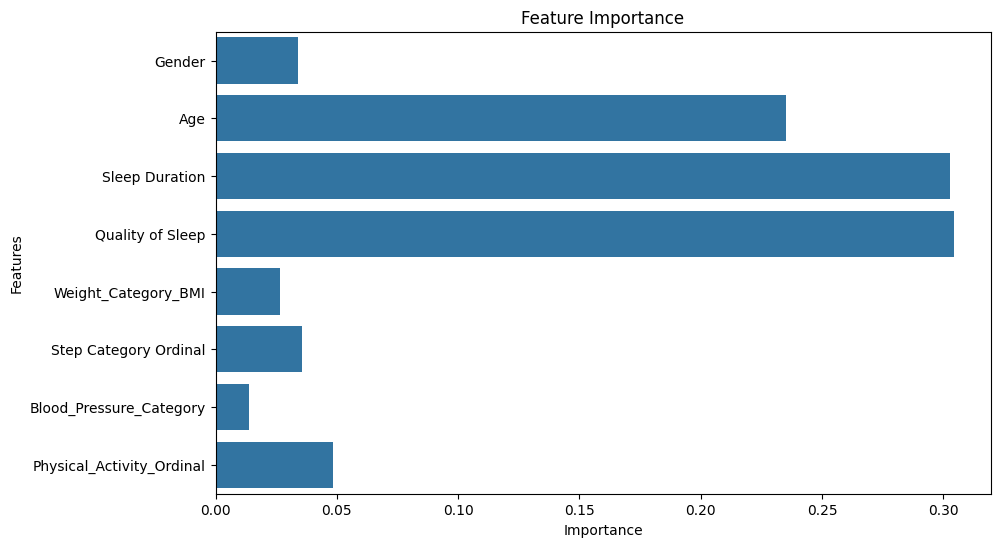

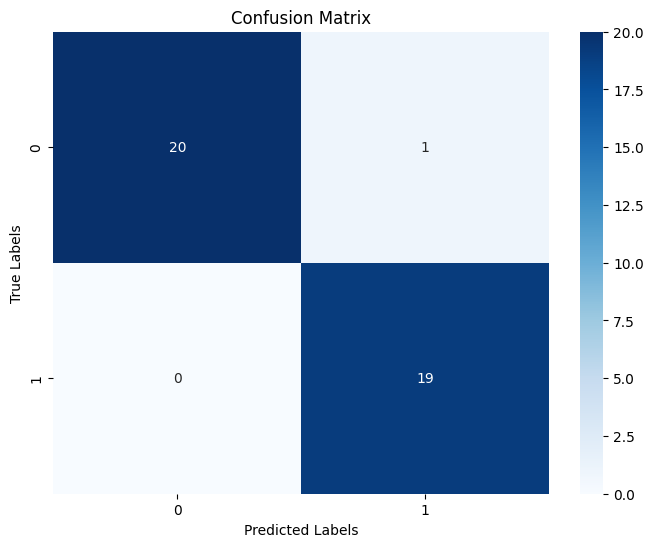

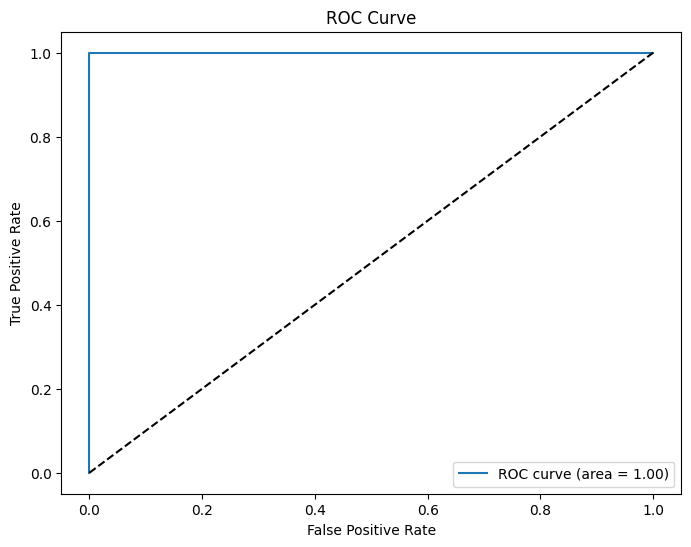

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Train the Random Forest Classifier as before
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# 1. Feature Importance Plot
feature_importances = rf_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# 2. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 3. ROC Curve (for binary classification)
if len(y.unique()) == 2:  # Only plot ROC if binary classification
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
